<a href="https://colab.research.google.com/github/SEJUNTONY/Data_Science_Class/blob/EunJi/%EC%B2%AD%EB%AC%BC%ED%8F%AC21%EA%B8%B0_%EB%8D%B0%EC%82%AC_1117_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우를 통한 자동차 연비 예측

In [1]:
# 데이터 분석을 위한 pandas, 시각화 위한 seaborn 불러오기
import pandas as pd
import seaborn as sns

In [2]:
# 자동차연비 데이터셋 mpg 불러오기
df = sns.load_dataset("mpg")

# 결측치 확인

In [3]:
# 결측치 합계
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [4]:
# dropna: 결측치를 버린다.
df = df.dropna()
df.shape

(392, 9)

In [5]:
# select_dtypes
df = df.select_dtypes(exclude="object")
df.shape

(392, 7)

In [6]:
# describe
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# 데이터셋 나누기

In [7]:
# train_dataset
# test_dataset
# 기출문제로 공부 -> 실전 시험 보는 과정
train_dataset = df.sample(frac=0.8, random_state=42)
# 전체 데이터의 0.8(80%)를 선별
train_dataset.shape

test_dataset = df.drop(train_dataset.index)
# 전체 데이터의 0.8(80%)를 선별
test_dataset.shape


(78, 7)

In [8]:
# train_dataset, test_dataset에서 label(정답)을 꺼내 label 따로 생성
train_lables = train_dataset.pop("mpg")
train_lables

test_lables = test_dataset.pop("mpg")
test_lables.shape

(78,)

# 딥러닝 모델

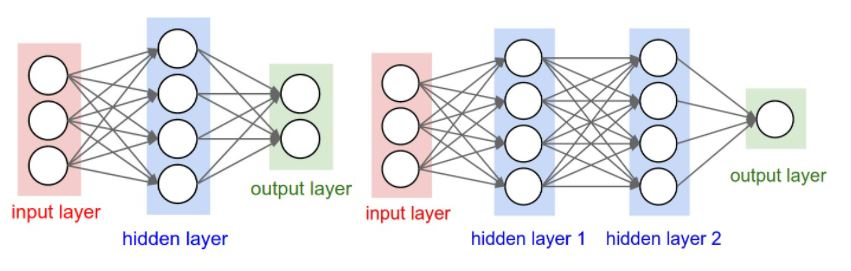

In [9]:
# tensorflow 불러오기
import tensorflow as tf

# 딥러닝 층 구성

In [10]:
model = tf.keras.Sequential()
# 64 --> 임의의 숫자를 입력해줘도 된다
# input shape ; 변수의 개수
model.add(tf.keras.layers.Dense(64, activation="relu", input_shape=[len(train_dataset.keys())]))
# dense 동그라미 수, 교실
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
# 위의 두 문장은 히든레이어 2개를 의미
model.add(tf.keras.layers.Dense(1))

In [11]:
# mae : 오차에 대한 절대값의 평균
# mse : 모델의 오차를 어떻게 측정을 할 것인지
model.compile(loss="mse", metrics=["mae", "mse"])

In [12]:
# 만든 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 딥러닝 모델로 학습하기
# epochs : 몇번을 이용해서 학습을 시킬 것인가
# verbose : log를 어떻게 찍을건지를 의미
model.fit(train_dataset, train_lables, epochs=100, verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 15779.1367 - mae: 55.2017 - mse: 15779.1367
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1202.4437 - mae: 23.3543 - mse: 1202.4437
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 4827.9497 - mae: 53.6696 - mse: 4827.9497
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 4063.8574 - mae: 58.6974 - mse: 4063.8574
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 3685.2593 - mae: 57.1264 - mse: 3685.2593
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 2187.8735 - mae: 38.9399 - mse: 2187.8735
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 4144.5112 - mae: 57.1728 - mse: 4144.5112
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 3039.5964 - mae: 44.4151 - mse: 3039.5964
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 1118.

In [14]:
# 딥러닝 모델로 평가
# 평균적으로 절대값이 mae만큼 차이가 난다.
# mse같은 경우, error값을 제곱을 한 값이 mse정도 된다
# mae값을 줄일수록 좋은 모델이라는 것을 확인 가능하다
model.evaluate(test_dataset, test_lables)

3/3 [==============================] - 0s 4ms/step - loss: 56.0852 - mae: 6.1551 - mse: 56.0852


[56.085174560546875, 6.155093669891357, 56.085174560546875]

In [15]:
# 딥러닝 모델의 예측하기
# flatten() : 1차원 형태로 만들어주기
predict_lables = model.predict(test_dataset).flatten()
predict_lables[:5]

array([16.740564 ,  0.8584578, 26.428621 , 23.493176 , 16.88202  ],
      dtype=float32)

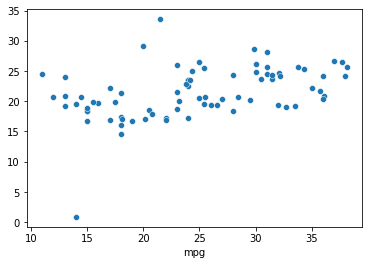

In [16]:
# 딥러닝 모델의 예측결과 평가하기
sns.scatterplot(x=test_lables, y=predict_lables)

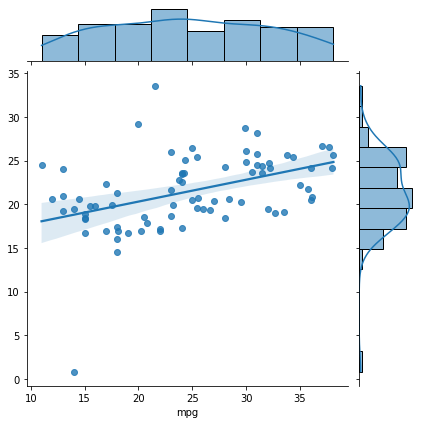

In [17]:
sns.jointplot(x=test_lables, y=predict_lables, kind="reg")